# 逻辑回归实践作业

## 完成移动客户流失或大学生恋爱数据的逻辑回归分析，并模型结果进行评价

**具体要求如下**

**（1）两个数据任选一个分析，要求是完整的数据分析流程**

**（2）代码在此文档中完成**

**（3）另外三人合作完成一份基于此数据的分析报告（背景、数据介绍、描述分析、模型思想、模型构建及评价、结论及建议，格式：宋体、小四、1.5倍行距）**



### （1）导入数据

In [3]:
import os
os.chdir("F:/大三（上）/机器学习/3.实践作业/3.实践作业/")

import pandas as pd
# 读入数据
data = pd.read_csv('大学生恋爱数据.csv',encoding='gbk') 

###   (2) 查看数据概况，是否有缺失值、数据类型等

In [4]:
data.head()

,是否恋爱,年级,性别,是否追求过别人,是否被别人追求过,每周自习时间,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,...,乐器,其他才艺,家乡,成绩水平,生活费_百元,寝室同学是否谈过恋爱,身高,体重,是否戴眼镜,颜值
0,否,大四,男,否,否,50,45,70,0,70,...,否,是,3三线城市,30,13,是,170,59.0,是,0
1,否,大三,男,否,否,5,45,63,5,0,...,是,否,3三线城市,10,7,是,171,70.0,是,0
2,否,大三,女,否,否,6,4,60,1,30,...,否,是,3三线城市,60,12,是,160,61.0,是,5
3,否,大四,女,是,是,16,11,56,10,38,...,否,是,1一线城市,31,8,是,162,50.0,是,6
4,否,大四,男,否,否,35,25,42,5,40,...,否,是,5农村,55,10,是,175,72.0,是,5


In [5]:
data.shape

(293, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   是否恋爱        293 non-null    object 
 1   年级          293 non-null    object 
 2   性别          293 non-null    object 
 3   是否追求过别人     293 non-null    object 
 4   是否被别人追求过    293 non-null    object 
 5   每周自习时间      293 non-null    int64  
 6   每周娱乐时间      293 non-null    int64  
 7   每周睡觉时间      293 non-null    int64  
 8   每周运动时间      293 non-null    int64  
 9   每月话费        293 non-null    int64  
 10  学生组织个数      293 non-null    int64  
 11  班干部         293 non-null    object 
 12  党员          293 non-null    object 
 13  足球          293 non-null    object 
 14  篮球          293 non-null    object 
 15  乒乓球         293 non-null    object 
 16  羽毛球         293 non-null    object 
 17  跑步          293 non-null    object 
 18  台球          293 non-null    object 
 19  唱歌          293 non-null    o

In [7]:
data.describe()

,每周自习时间,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,学生组织个数,成绩水平,生活费_百元,身高,体重,颜值
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,19.242321,16.044369,53.982935,6.136519,56.931741,2.935154,43.870307,26.058020,169.324232,60.148464,6.204778
std,12.859328,13.468942,10.804127,4.965821,27.914905,1.699887,27.104887,24.364808,9.162946,12.150778,2.418333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,30.000000,0.000000
25%,10.000000,6.000000,50.000000,3.000000,36.000000,2.000000,21.000000,14.000000,162.000000,50.000000,5.000000
50%,17.000000,13.000000,55.000000,5.000000,50.000000,3.000000,41.000000,20.000000,170.000000,58.000000,6.000000
75%,28.000000,21.000000,60.000000,8.000000,80.000000,4.000000,60.000000,25.000000,176.000000,65.000000,8.000000
max,50.000000,100.000000,100.000000,46.000000,100.000000,6.000000,100.000000,100.000000,192.000000,101.000000,10.000000


### （3）描述分析

因变量描述

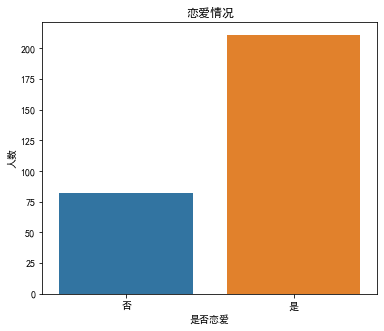

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
#plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

双变量-分类变量与因变量

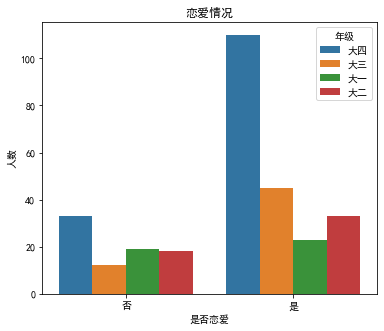

In [30]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='年级',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

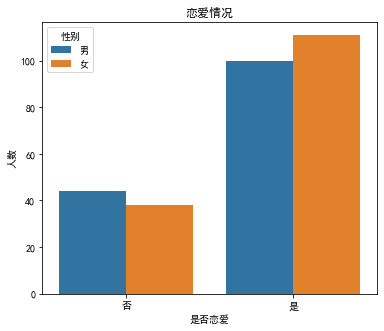

In [31]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='性别',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

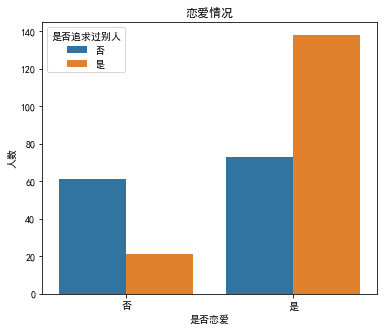

In [32]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='是否追求过别人',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

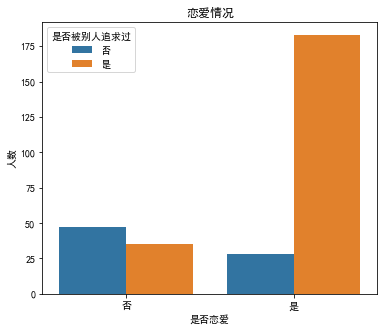

In [33]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='是否被别人追求过',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

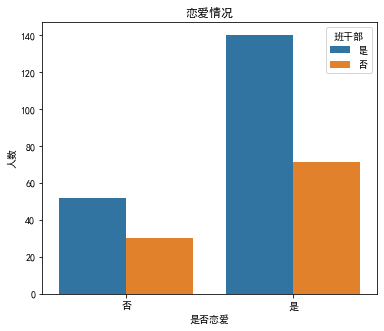

In [34]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='班干部',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show() 

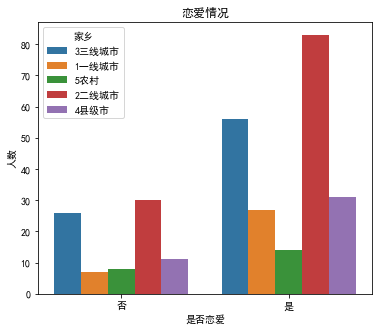

In [35]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='家乡',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

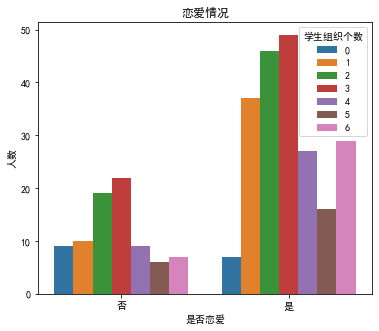

In [36]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='学生组织个数',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

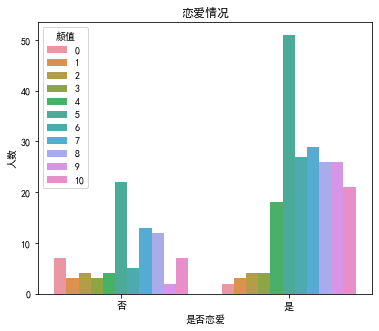

In [37]:
plt.figure(figsize=(6, 5))
sns.countplot(x='是否恋爱',hue='颜值',data=data)
plt.title(u'恋爱情况') 
plt.xlabel(u'是否恋爱')
plt.ylabel(u'人数')
plt.show()

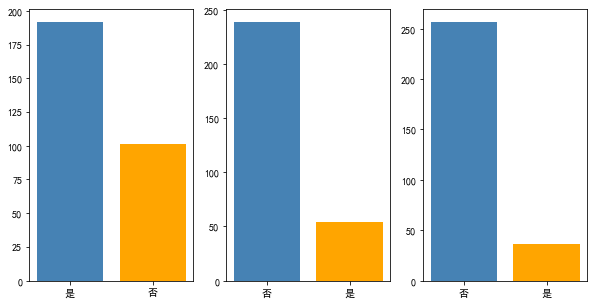

In [38]:
fig = plt.figure(3, figsize=(10, 5))
ax1 = plt.subplot(131) 
ax1.bar(data['班干部'].value_counts().index,data['班干部'].value_counts().values,color = ['steelblue','orange'])

ax2 = plt.subplot(132) 
ax2.bar(data['党员'].value_counts().index,data['党员'].value_counts().values,color = ['steelblue','orange'])

ax3 = plt.subplot(133) 
ax3.bar(data['足球'].value_counts().index,data['足球'].value_counts().values,color = ['steelblue','orange'])
plt.show()

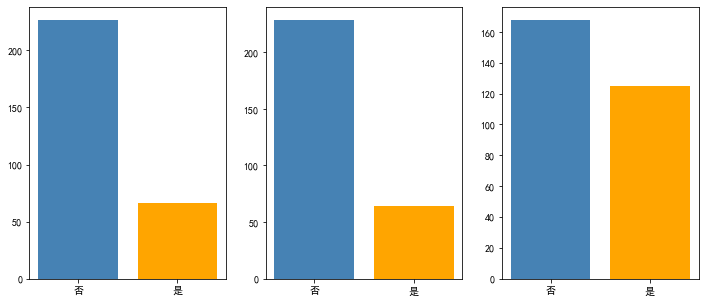

In [39]:
plt.figure(6, figsize=(12, 5)) 

ax1 = plt.subplot(131) 
ax1.bar(data['篮球'].value_counts().index,data['篮球'].value_counts().values,color = ['steelblue','orange'])

ax2 = plt.subplot(132) 
ax2.bar(data['乒乓球'].value_counts().index,data['乒乓球'].value_counts().values,color = ['steelblue','orange'])

ax3 = plt.subplot(133) 
ax3.bar(data['羽毛球'].value_counts().index,data['羽毛球'].value_counts().values,color = ['steelblue','orange'])
plt.show()

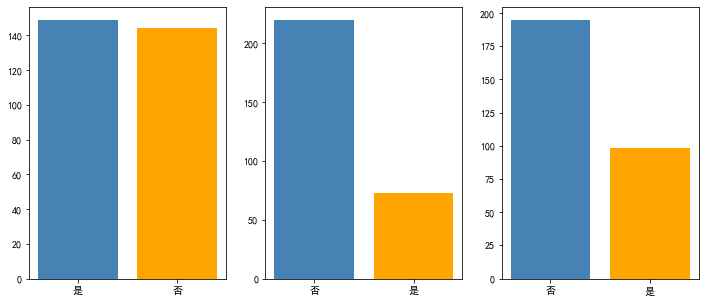

In [40]:
plt.figure(6, figsize=(12, 5)) 

ax1 = plt.subplot(131) 
ax1.bar(data['跑步'].value_counts().index,data['跑步'].value_counts().values,color = ['steelblue','orange'])

ax2 = plt.subplot(132) 
ax2.bar(data['台球'].value_counts().index,data['台球'].value_counts().values,color = ['steelblue','orange'])

ax3 = plt.subplot(133) 
ax3.bar(data['唱歌'].value_counts().index,data['唱歌'].value_counts().values,color = ['steelblue','orange'])
plt.show()

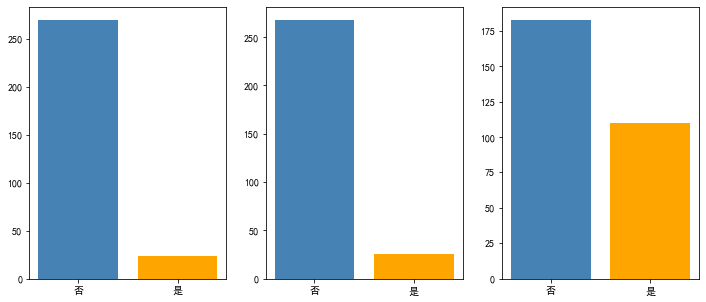

In [41]:
plt.figure(6, figsize=(12, 5)) 

ax1 = plt.subplot(131) 
ax1.bar(data['主持'].value_counts().index,data['主持'].value_counts().values,color = ['steelblue','orange'])

ax2 = plt.subplot(132) 
ax2.bar(data['舞蹈'].value_counts().index,data['舞蹈'].value_counts().values,color = ['steelblue','orange'])

ax3 = plt.subplot(133) 
ax3.bar(data['乐器'].value_counts().index,data['乐器'].value_counts().values,color = ['steelblue','orange'])
plt.show()

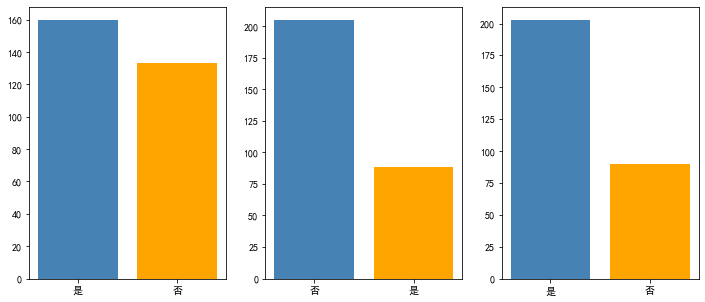

In [42]:
plt.figure(6, figsize=(12, 5)) 

ax1 = plt.subplot(131) 
ax1.bar(data['其他才艺'].value_counts().index,data['其他才艺'].value_counts().values,color = ['steelblue','orange'])

ax2 = plt.subplot(132) 
ax2.bar(data['寝室同学是否谈过恋爱'].value_counts().index,data['寝室同学是否谈过恋爱'].value_counts().values,color = ['steelblue','orange'])

ax3 = plt.subplot(133) 
ax3.bar(data['是否戴眼镜'].value_counts().index,data['是否戴眼镜'].value_counts().values,color = ['steelblue','orange'])
plt.show()

双变量-连续数值变量与因变量

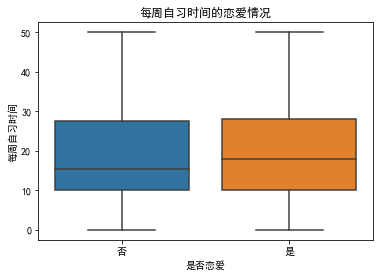

In [43]:
sns.boxplot(x='是否恋爱',y='每周自习时间',data=data)
plt.title(u'每周自习时间的恋爱情况')
plt.xlabel(u'是否恋爱')
plt.ylabel(u'每周自习时间')
plt.show()

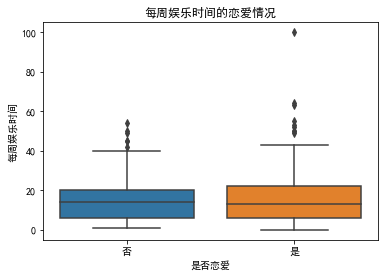

In [44]:
sns.boxplot(x='是否恋爱',y='每周娱乐时间',data=data)
plt.title(u'每周娱乐时间的恋爱情况')
plt.xlabel(u'是否恋爱')
plt.ylabel(u'每周娱乐时间')
plt.show()

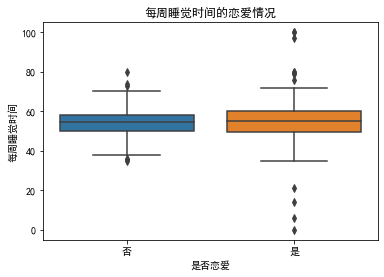

In [45]:
sns.boxplot(x='是否恋爱',y='每周睡觉时间',data=data)
plt.title(u'每周睡觉时间的恋爱情况')
plt.xlabel(u'是否恋爱')
plt.ylabel(u'每周睡觉时间')
plt.show()

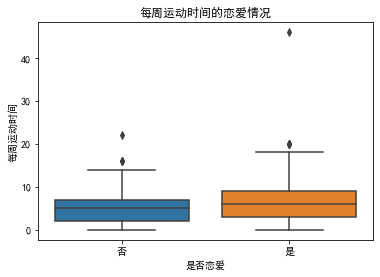

In [46]:
sns.boxplot(x='是否恋爱',y='每周运动时间',data=data)
plt.title(u'每周运动时间的恋爱情况')
plt.xlabel(u'是否恋爱')
plt.ylabel(u'每周运动时间')
plt.show()

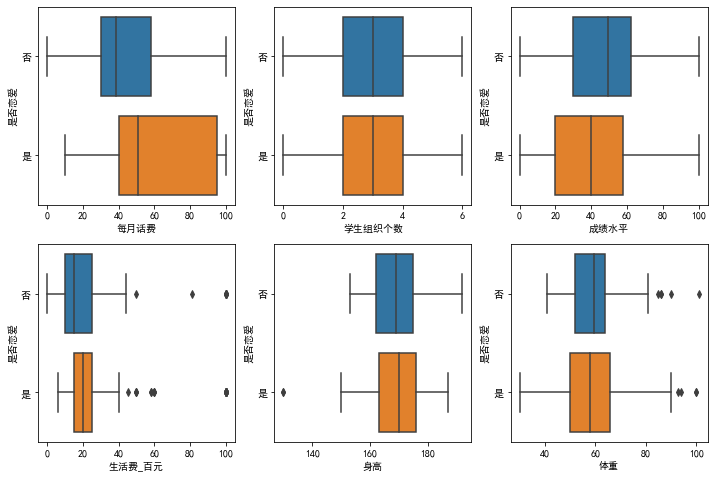

In [47]:
## seaborn绘制箱线图
plt.figure(6, figsize=(12, 8)) #设置画布

plt.subplot(231)  
sns.boxplot(x='每月话费',y='是否恋爱',data=data)

plt.subplot(232)  
sns.boxplot(x='学生组织个数',y='是否恋爱',data=data)

plt.subplot(233)  
sns.boxplot(x='成绩水平',y='是否恋爱',data=data)

plt.subplot(234)  
sns.boxplot(x='生活费_百元',y='是否恋爱',data=data)

plt.subplot(235) 
sns.boxplot(x='身高',y='是否恋爱',data=data)

plt.subplot(236) 
sns.boxplot(x='体重',y='是否恋爱',data=data)

plt.show()

### （4）特征处理

In [48]:
# 分类变量编码
data['年级']=data['年级'].astype(str)
class_data=pd.get_dummies(data[['年级','性别','是否追求过别人','是否被别人追求过','班干部','党员','足球','篮球','乒乓球','羽毛球','跑步','台球','唱歌','主持','舞蹈','乐器','其他才艺','家乡','寝室同学是否谈过恋爱','是否戴眼镜']], drop_first=True)
class_data.head() 

,年级_大三,年级_大二,年级_大四,性别_男,是否追求过别人_是,是否被别人追求过_是,班干部_是,党员_是,足球_是,篮球_是,...,主持_是,舞蹈_是,乐器_是,其他才艺_是,家乡_2二线城市,家乡_3三线城市,家乡_4县级市,家乡_5农村,寝室同学是否谈过恋爱_是,是否戴眼镜_是
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
2,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,1
3,0,0,1,0,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,1


In [49]:
# 数值变量数据标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_data=scaler.fit_transform(data[['每周自习时间','每周娱乐时间','每周睡觉时间','每周运动时间','每月话费','学生组织个数','成绩水平','生活费_百元','身高','体重','颜值']])
num_data=pd.DataFrame(num_data,columns=['每周自习时间','每周娱乐时间','每周睡觉时间','每周运动时间','每月话费','学生组织个数','成绩水平','生活费_百元','身高','体重','颜值'])
num_data.head()

,每周自习时间,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,学生组织个数,成绩水平,生活费_百元,身高,体重,颜值
0,2.395950,2.153485,1.485031,-1.237865,0.468947,-1.729630,-0.512603,-0.536855,0.073876,-0.094679,-2.570115
1,-1.109443,2.153485,0.836022,-0.229260,-2.042964,-1.729630,-1.251739,-0.783533,0.183198,0.812161,-2.570115
2,-1.031545,-0.895763,0.557876,-1.036144,-0.966431,0.627494,0.596102,-0.577968,-1.019343,0.070201,-0.499038
3,-0.252569,-0.375159,0.187013,0.779346,-0.679355,1.216774,-0.475646,-0.742420,-0.800699,-0.836640,-0.084822
4,1.227485,0.666047,-1.111005,-0.229260,-0.607586,-1.140349,0.411318,-0.660194,0.620486,0.977041,-0.499038


In [50]:
#数据拼接
data_new=pd.concat([data['是否恋爱'],class_data,num_data],axis=1)
data_new.head()

,是否恋爱,年级_大三,年级_大二,年级_大四,性别_男,是否追求过别人_是,是否被别人追求过_是,班干部_是,党员_是,足球_是,...,每周娱乐时间,每周睡觉时间,每周运动时间,每月话费,学生组织个数,成绩水平,生活费_百元,身高,体重,颜值
0,否,0,0,1,1,0,0,1,0,0,...,2.153485,1.485031,-1.237865,0.468947,-1.729630,-0.512603,-0.536855,0.073876,-0.094679,-2.570115
1,否,1,0,0,1,0,0,0,0,0,...,2.153485,0.836022,-0.229260,-2.042964,-1.729630,-1.251739,-0.783533,0.183198,0.812161,-2.570115
2,否,1,0,0,0,0,0,1,1,0,...,-0.895763,0.557876,-1.036144,-0.966431,0.627494,0.596102,-0.577968,-1.019343,0.070201,-0.499038
3,否,0,0,1,0,1,1,1,0,0,...,-0.375159,0.187013,0.779346,-0.679355,1.216774,-0.475646,-0.742420,-0.800699,-0.836640,-0.084822
4,否,0,0,1,1,0,0,0,0,0,...,0.666047,-1.111005,-0.229260,-0.607586,-1.140349,0.411318,-0.660194,0.620486,0.977041,-0.499038


### （5）拆分数据集

In [51]:
from sklearn.model_selection import train_test_split

X = data_new.drop('是否恋爱', axis=1)
y = data_new.是否恋爱
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=52)

In [52]:
X_train.shape

(263, 36)

In [53]:
X_test.shape

(30, 36)

In [54]:
y_test.value_counts

<bound method IndexOpsMixin.value_counts of 159    是
262    是
136    是
6      否
169    是
181    是
220    是
244    是
76     否
127    是
229    是
62     否
161    是
222    是
114    是
280    是
1      否
204    是
231    是
79     否
94     是
269    是
289    是
83     是
221    是
205    是
167    是
243    是
168    是
196    是
Name: 是否恋爱, dtype: object>

### （6）构建逻辑回归模型 

In [55]:
#训练模型
from sklearn import linear_model
from sklearn import metrics 

LR_model = linear_model.LogisticRegression(max_iter=1000,random_state=52)
LR_model.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#在测试集上验证
y_predict=LR_model.predict(X_test) #输出分类结果
y_predict_prob=LR_model.predict_proba(X_test)[:,1] #输出是正例1的概率

In [57]:
y_predict

array(['否', '是', '是', '是', '否', '是', '否', '是', '否', '是', '是', '是', '否',
       '否', '是', '是', '否', '是', '是', '否', '是', '是', '是', '是', '是', '是',
       '是', '是', '是', '是'], dtype=object)

In [58]:
y_predict_prob

array([0.20771026, 0.76518009, 0.57162189, 0.85815564, 0.45563452,
       0.73704553, 0.22262371, 0.88727498, 0.43054923, 0.93535622,
       0.84327675, 0.64338949, 0.44530915, 0.37401858, 0.95155194,
       0.88491694, 0.24309498, 0.97244408, 0.81301068, 0.20633591,
       0.93803896, 0.93560372, 0.84847527, 0.97197944, 0.87757523,
       0.9837593 , 0.92883481, 0.74766297, 0.5441997 , 0.86448692])

In [59]:
y_predict_prob.max()

0.9837592995702723

In [60]:
y_predict_prob.min()

0.2063359134021904

In [61]:
metrics.roc_auc_score(y_test,y_predict_prob) #AUC

0.7999999999999999

In [62]:
print('查准率','查全率','F1值：')
print(metrics.classification_report(y_test,y_predict))

查准率 查全率 F1值：
              precision    recall  f1-score   support

           否       0.38      0.60      0.46         5
           是       0.91      0.80      0.85        25

    accuracy                           0.77        30
   macro avg       0.64      0.70      0.66        30
weighted avg       0.82      0.77      0.79        30



In [63]:
print('混淆矩阵：')
print(metrics.confusion_matrix(y_test,y_predict)) 

混淆矩阵：
[[ 3  2]
 [ 5 20]]


In [64]:
y_test

159    是
262    是
136    是
6      否
169    是
181    是
220    是
244    是
76     否
127    是
229    是
62     否
161    是
222    是
114    是
280    是
1      否
204    是
231    是
79     否
94     是
269    是
289    是
83     是
221    是
205    是
167    是
243    是
168    是
196    是
Name: 是否恋爱, dtype: object

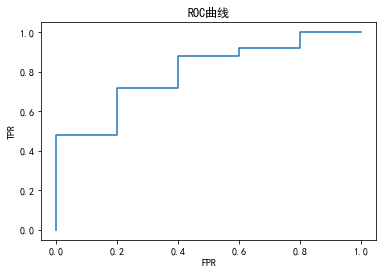

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob, pos_label= '是')
plt.plot(fpr, tpr) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()

### （7）结果分析 

In [66]:
feature_list=list(X_train.columns)
print(feature_list)

['年级_大三', '年级_大二', '年级_大四', '性别_男', '是否追求过别人_是', '是否被别人追求过_是', '班干部_是', '党员_是', '足球_是', '篮球_是', '乒乓球_是', '羽毛球_是', '跑步_是', '台球_是', '唱歌_是', '主持_是', '舞蹈_是', '乐器_是', '其他才艺_是', '家乡_2二线城市', '家乡_3三线城市', '家乡_4县级市', '家乡_5农村', '寝室同学是否谈过恋爱_是', '是否戴眼镜_是', '每周自习时间', '每周娱乐时间', '每周睡觉时间', '每周运动时间', '每月话费', '学生组织个数', '成绩水平', '生活费_百元', '身高', '体重', '颜值']


In [67]:
weight=LR_model.coef_
weight=weight[0]
print(weight)

[ 0.33307436 -0.3338986  -0.02056752 -0.16410348  1.47482834  1.87226774
 -0.11508781 -0.00831581 -0.11086368 -0.0425965  -0.7939128  -0.28048893
  0.15917996  0.8578829   0.1247632   0.5337059  -0.44779671  0.49290655
  0.52213802  0.45537841 -0.06657866  0.20407018 -0.70833234  1.43595433
  0.30387972 -0.01658537  0.07680058 -0.03019559 -0.01601318  0.33915038
  0.16071214 -0.1021454  -0.05739637  0.06190871  0.11038503  0.26819561]


In [68]:
df=pd.DataFrame({'feature':feature_list,'weight':weight})
df=df.sort_values('weight',ascending=False)
df

,feature,weight
5,是否被别人追求过_是,1.872268
4,是否追求过别人_是,1.474828
23,寝室同学是否谈过恋爱_是,1.435954
13,台球_是,0.857883
15,主持_是,0.533706
18,其他才艺_是,0.522138
17,乐器_是,0.492907
19,家乡_2二线城市,0.455378
29,每月话费,0.339150
0,年级_大三,0.333074


## （选做题）模仿参考代码，利用逻辑回归模型，能够预测图片中人的性别（男或女）

**选做，如果代码没问题，建议将结果也写成小的文章（建模思想、数据处理过程及模型结果、评价等）

### (1）前期准备

In [78]:
import os
filePath = '二分类图'
items = os.listdir(filePath)

In [79]:
#为了避免有不是jpg格式的文件，有临时文件时可能会有问题，多做一步
namelist=[]
for name in items:
    if name.endswith(".jpg"):
        namelist.append(name)

In [80]:
len(namelist)

350

In [74]:
namelist[0] #355表示图片编号，后面的35表示人的类别

'0_male.jpg'

In [75]:
#需要将类别（输出）拆解出来
namelist[0][:-4].split("_")

['0', 'male']

### （2）读取图片，将图片作为特征X，将人的类别作为输出Y

In [82]:
from PIL import Image
import numpy as np
X=np.empty((0,4096))
n_pixels=64
for i in namelist:
    img=np.array(Image.open(filePath+i).convert('L'), 'f')
    img_new=img.reshape(1,4096)
    X=np.vstack((X,img_new)) 

FileNotFoundError: [Errno 2] No such file or directory: '二分类图0_male.jpg'

In [8]:
X.shape 

(350, 4096)

In [9]:
X[:5]

array([[ 77.,  91., 104., ...,  25.,  15.,  30.],
       [ 68.,  39.,  43., ...,   0.,  13.,   0.],
       [ 25.,  47., 192., ...,  12.,  54.,  39.],
       [ 75.,  11.,  58., ...,   7.,  64.,  25.],
       [ 10., 165., 246., ...,   4.,   0.,   1.]])

In [10]:
y=[]
for i in namelist:
    people=i[:-4].split("_")[1]
    y.append(people) 

In [11]:
y=np.array(y)
y

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
      

### （3）划分训练集和测试集 

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [22]:
X_train.shape

(346, 4096)

In [23]:
X_test.shape

(4, 4096)

### （4）构建多分类逻辑回归模型 

In [30]:
#训练模型
from sklearn import linear_model
from sklearn import metrics 

LR_model = linear_model.LogisticRegression(max_iter=10000)
LR_model.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#在测试集上验证
y_predict=LR_model.predict(X_test) #输出分类结果

In [32]:
y_predict_prob=LR_model.predict_proba(X_test)
y_predict_prob

array([[1.80178095e-11, 1.00000000e+00],
       [2.39452902e-12, 1.00000000e+00],
       [2.26974217e-10, 1.00000000e+00],
       [4.59625525e-08, 9.99999954e-01]])

### （5）看模型效果 

In [33]:
y_predict

array(['male', 'male', 'male', 'male'], dtype='<U6')

In [34]:
y_test

array(['male', 'male', 'female', 'male'], dtype='<U6')

In [35]:
print('混淆矩阵：')
print(metrics.confusion_matrix(y_test,y_predict)) 

混淆矩阵：
[[0 1]
 [0 3]]


从上面预测结果来看，预测非常准确